#**MODEL-1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ex8data1.mat to ex8data1.mat


In [ ]:
from scipy.io import loadmat
data=loadmat("ex8data1.mat")

In [ ]:
x=data['X']

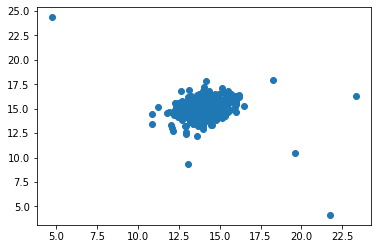

In [ ]:
plt.scatter(x[:,0],x[:,1])

(array([[  1.,   0.,   0.,   9., 170., 122.,   2.,   1.,   1.,   1.],
        [  1.,   0.,   1.,   2.,  53., 219.,  30.,   0.,   0.,   1.]]),
 array([ 4.12623222,  6.14864973,  8.17106723, 10.19348473, 12.21590223,
        14.23831974, 16.26073724, 18.28315474, 20.30557224, 22.32798975,
        24.35040725]),
 <a list of 2 Lists of Patches objects>)

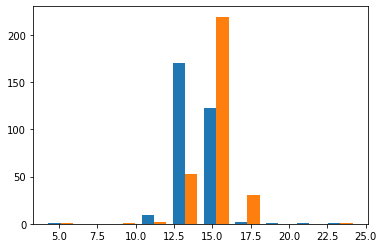

In [ ]:
plt.hist(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(x,random_state=1)

**METHOD-1**

Using Elliptic envelope method for detecting outliers in a Gaussian distributed dataset. This method is robust to other outliers.

In [ ]:
from sklearn.covariance import EllipticEnvelope
ee=EllipticEnvelope(random_state=0).fit(x_train)

In [ ]:
pred=ee.predict(x_test)

In [ ]:
ee.score(x_test,pred)

1.0

This shows accuracy is 100%

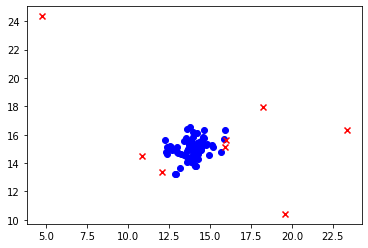

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red',marker='x')

**METHOD-2**

One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. Isolation forest detects anomalies by randomly partitioning the domain space.

In [ ]:
from sklearn.ensemble import IsolationForest
isf=IsolationForest(n_estimators=100,contamination=float(0.1)).fit(x_train)
pred=isf.predict(x_test)

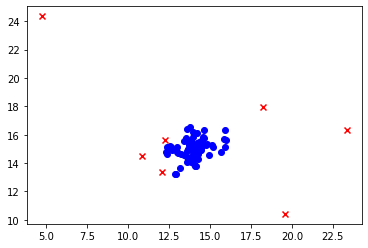

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red',marker='x')

In [ ]:
isf.decision_function(x_test)

array([ 0.11685946,  0.10010279,  0.11903112, -0.24174682,  0.08483252,
        0.0711791 ,  0.08690887,  0.1077754 ,  0.04320087,  0.0287689 ,
       -0.18225098,  0.1144987 ,  0.09573734,  0.10647597,  0.07987484,
        0.08671741,  0.09276063,  0.11900507,  0.11202528,  0.08360943,
        0.08423148,  0.12766338,  0.11882684,  0.11993375, -0.15344552,
        0.11961693,  0.06937286,  0.11953681,  0.00171265,  0.09221402,
        0.10575843,  0.09997845,  0.00965924,  0.0942526 ,  0.10178014,
        0.11298324, -0.23753693,  0.02077677,  0.0596616 ,  0.11368772,
       -0.01341477,  0.08858044,  0.1110829 ,  0.11211853,  0.10767302,
        0.11624749,  0.03941988,  0.10471099,  0.09978667, -0.26877167,
        0.1006561 ,  0.04216114,  0.11131886,  0.07140458,  0.12027995,
        0.12798591,  0.09362361,  0.03707346,  0.1141151 , -0.0368314 ,
        0.01586933,  0.07303157,  0.0115363 ,  0.08119956,  0.11826062,
        0.1086281 ,  0.1239851 ,  0.00657184,  0.12055402,  0.10

**METHOD-3**

Local outlier factor is a density-based method that relies on nearest neighbors search.  it only compares the score of abnormality of one sample with the scores of its neighbors.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(novelty=True,metric='manhattan')

In [ ]:
lof.fit(x_train)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='manhattan', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

In [ ]:
pred=lof.predict(x_test)

In [ ]:
scores=lof.negative_outlier_factor_

In [ ]:
print(-scores)

[ 0.95390853  0.9997076   1.14659208  1.00710907  1.00074292  1.08827318
  1.08020964  1.19059126  1.00922604  0.99333903  1.01193821  1.02280614
  0.99231336  1.24355976  0.97886753  1.09412679  0.9682689   4.29948242
  0.99539845  1.12716961  1.00623394  1.01595566  1.71480261  1.23274278
  0.99990006  1.02090934  0.97154526  0.99742072  1.00351184  0.98852385
  1.28503018  1.09630763  1.05611985  0.99029814  1.01885315  1.02367641
  1.01046398  0.9844358   1.16562847  1.00336631  0.96429086  1.0805115
  1.14946737  0.95809144  1.01886556  1.02829685  0.98201842  1.02627051
  0.98981646  1.00133974  1.0039973   1.22188724  0.99600923  1.01445144
  1.0532715   1.09233177  1.14956321  1.02410523  1.0308382   1.2115157
  1.04216832  1.2645696   1.27699935  1.16143194  1.17278531  1.24850768
  0.99337325  1.03537719  1.08618654  1.39483917  1.04349538  0.97749031
  1.12043252  1.81638956  0.9753617   0.9696846   0.96185956  1.92122896
  1.18146392  1.00327782  1.00362825  1.11554082  1.1

In [ ]:
print(np.mean(-scores))

1.1885334063046018


This shows model performs quiet good.

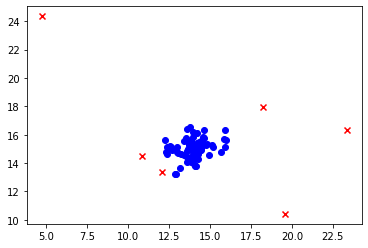

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red',marker='x')

**METHOD-4**

Unsupervised Outlier Detection.
Estimate the support of a high-dimensional distribution.
The implementation is based on libsvm.
The svm.OneClassSVM is known to be sensitive to outliers and thus does not perform very well for outlier detection. It soverfits the data. It is best used for novelty detection.

In [ ]:
from sklearn.svm import OneClassSVM
svm=OneClassSVM(gamma='scale').fit(x_train)

In [ ]:
pred=svm.predict(x_test)

In [ ]:
svm.score_samples(x_test)

array([4.60516168e+01, 4.66732397e+01, 4.68003745e+01, 0.00000000e+00,
       4.27577545e+01, 4.31320792e+01, 4.63207271e+01, 4.67231730e+01,
       3.64292516e+01, 3.74141159e+01, 5.88619173e-07, 4.56520865e+01,
       4.37933496e+01, 4.53183141e+01, 4.17633360e+01, 4.39055046e+01,
       4.45533994e+01, 4.72864388e+01, 4.73096054e+01, 4.60979161e+01,
       4.20122589e+01, 4.72737717e+01, 4.68138658e+01, 4.65234520e+01,
       1.14806399e+01, 4.64870090e+01, 4.17159238e+01, 4.78432816e+01,
       3.45670275e+01, 4.26922444e+01, 4.54659284e+01, 4.65716209e+01,
       3.14774346e+01, 4.68674507e+01, 4.23971341e+01, 4.64860712e+01,
       1.10267308e+00, 3.61076002e+01, 3.73116580e+01, 4.63644090e+01,
       2.84902537e+01, 4.45724923e+01, 4.73748619e+01, 4.68940756e+01,
       4.76591873e+01, 4.70095022e+01, 3.33288367e+01, 4.53760344e+01,
       4.46582780e+01, 3.42481615e-04, 4.54314576e+01, 3.58534512e+01,
       4.75621452e+01, 3.83746452e+01, 4.48194141e+01, 4.76989075e+01,
      

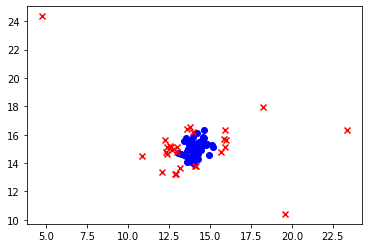

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red',marker='x')

#**MODEL 2**

In [ ]:
from google.colab import files
upload=files.upload()

Saving ex8data2.mat to ex8data2 (1).mat


In [ ]:
data2=loadmat('ex8data2.mat')

In [ ]:
x1=data2['X']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(x1,random_state=1)

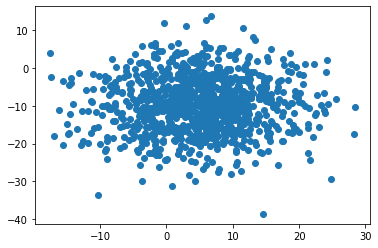

In [ ]:
plt.scatter(x1[:,0],x1[:,1])

**METHOD-1**

In [ ]:
from sklearn.covariance import EllipticEnvelope
eee=EllipticEnvelope(random_state=0).fit(x_train)

In [ ]:
pred=eee.predict(x_test)

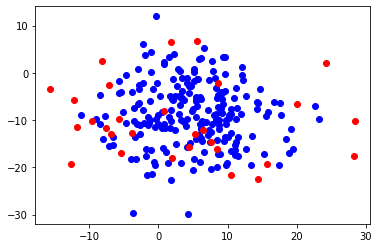

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red')

In [ ]:
eee.score(x_test,pred)

1.0

**METHOD-2**

In [ ]:
from sklearn.ensemble import IsolationForest
isf=IsolationForest(n_estimators=100).fit(x_train)

In [ ]:
pred=isf.predict(x_test)

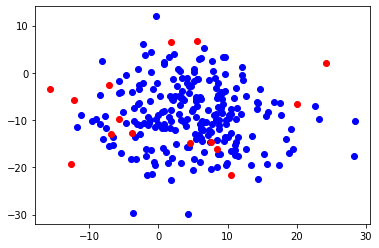

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red')

In [ ]:
isf.decision_function(x_test)

array([ 0.08288731,  0.06950566, -0.00526407,  0.01832777,  0.05309262,
        0.08910619, -0.06073258,  0.04295526,  0.10628165,  0.08464493,
        0.11550552,  0.10085053,  0.05516442,  0.07434039,  0.06487703,
        0.0728336 ,  0.05653872,  0.12423883,  0.05011396,  0.05737289,
       -0.0484221 ,  0.04065697,  0.12476951,  0.03922997,  0.03730075,
        0.08954437,  0.04052886,  0.02119377,  0.06182788,  0.06245574,
        0.07163784,  0.05816943,  0.06618742,  0.05149638,  0.06614077,
        0.07151848,  0.08979312, -0.0330553 ,  0.08689941,  0.03391738,
        0.09246395,  0.08236162,  0.08839933,  0.09954246,  0.04117929,
        0.04098719,  0.10566407,  0.09712057,  0.0737022 ,  0.11454842,
        0.01183   ,  0.05988874,  0.0659856 ,  0.06921351,  0.12419483,
       -0.0193081 ,  0.02065702,  0.06340436,  0.03977933, -0.056861  ,
        0.00080033,  0.03031324,  0.0550747 ,  0.06846021,  0.03444677,
        0.10582829,  0.07172458,  0.09262627,  0.09355138,  0.04

**METHOD-3**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(novelty=True,metric='manhattan')

In [ ]:
lof.fit(x_train)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='manhattan', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

In [ ]:
pred=lof.predict(x_test)

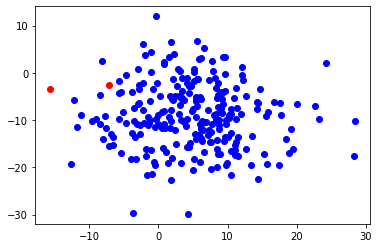

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red')

In [ ]:
from sklearn.svm import OneClassSVM
svm=OneClassSVM(gamma='scale').fit(x_train)

In [ ]:
pred=svm.predict(x_test)

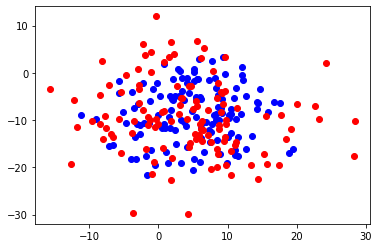

In [ ]:
plt.scatter(x_test[pred==1,0],x_test[pred==1,1],color='blue')
plt.scatter(x_test[pred==-1,0],x_test[pred==-1,1],color='red')

In [ ]:
s=svm.score_samples(x1)